In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [2]:
iris_data = pd.read_csv("Iris.csv",index_col='No')

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
No,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [7]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
No,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


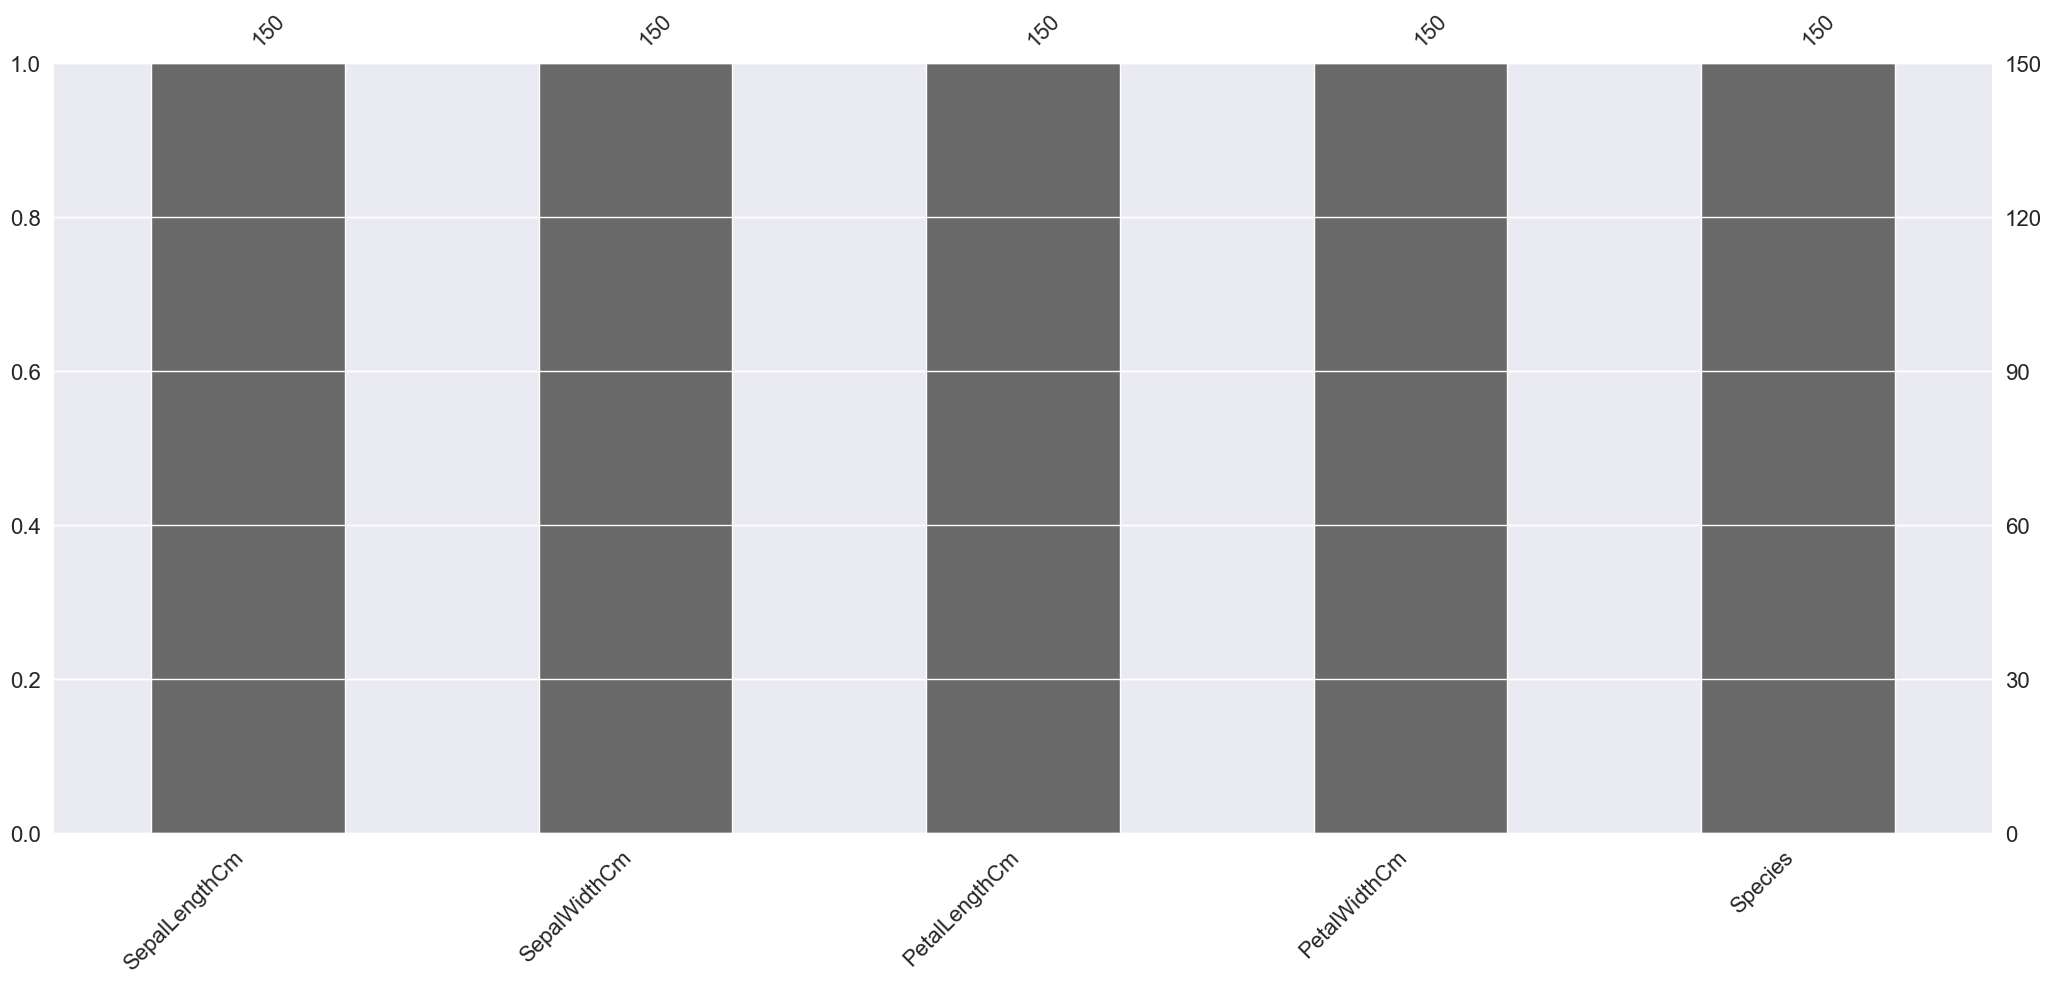

In [8]:

import missingno as msno
p=msno.bar(iris_data)

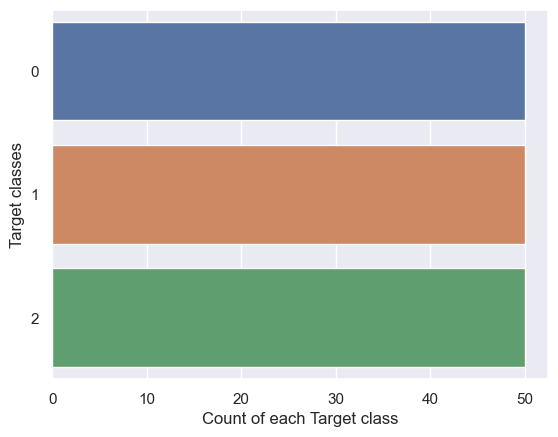

In [9]:
sns.countplot(y=iris_data.Species ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()


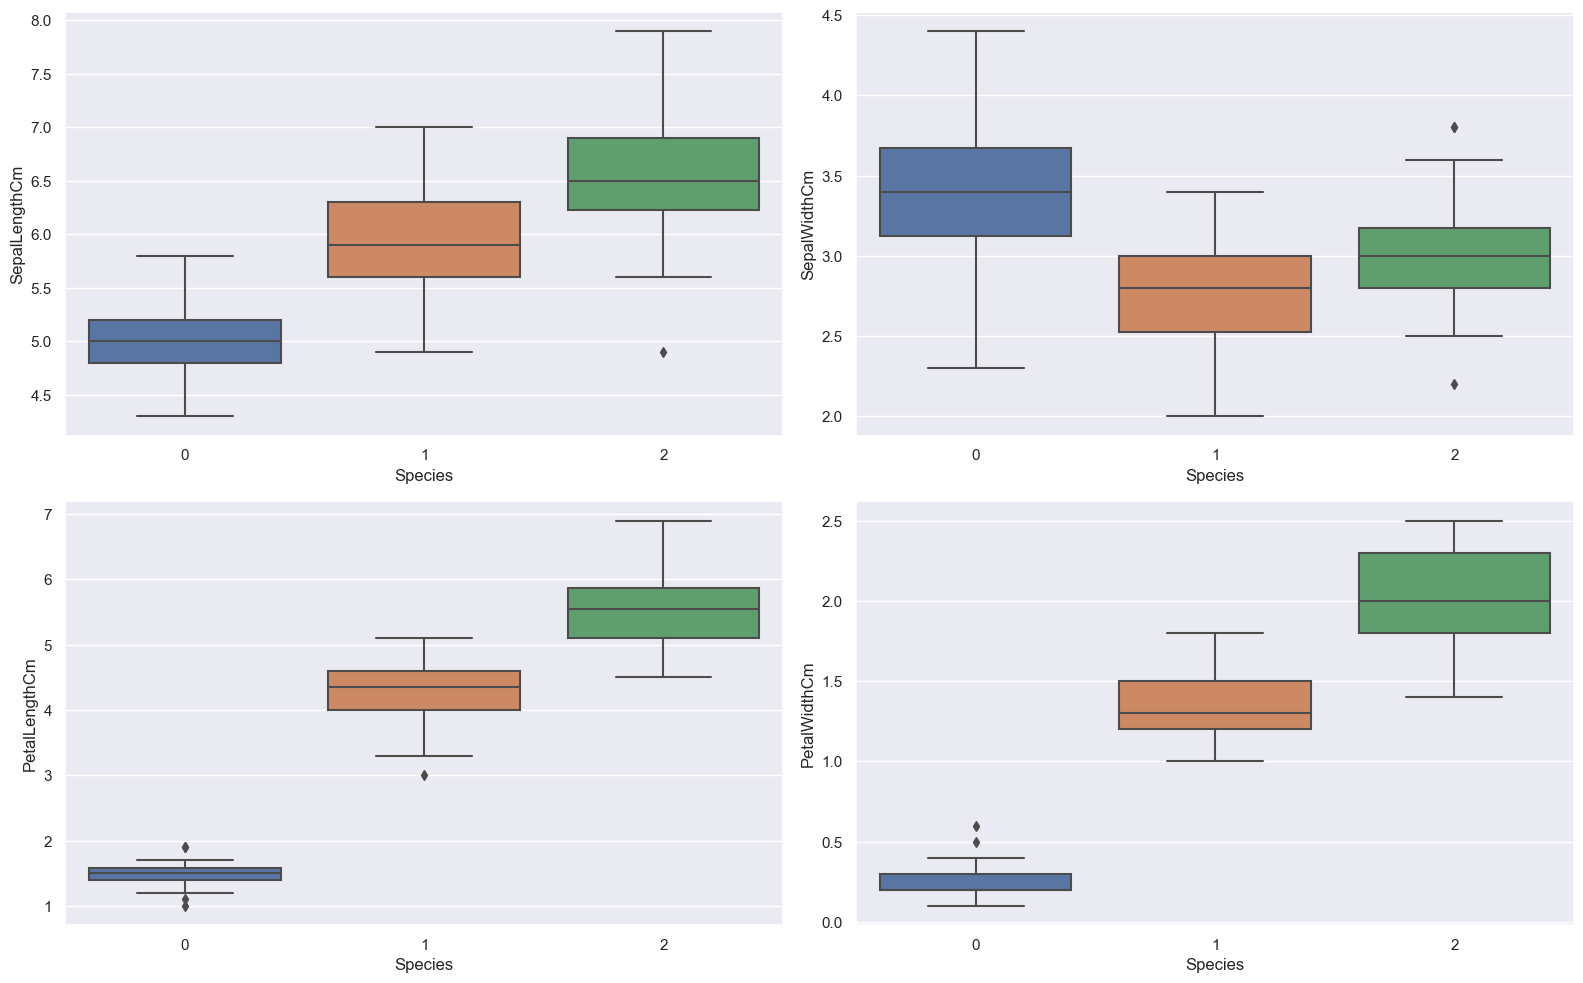

In [10]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(iris_data.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris_data['Species'], y = iris_data[iris_data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()


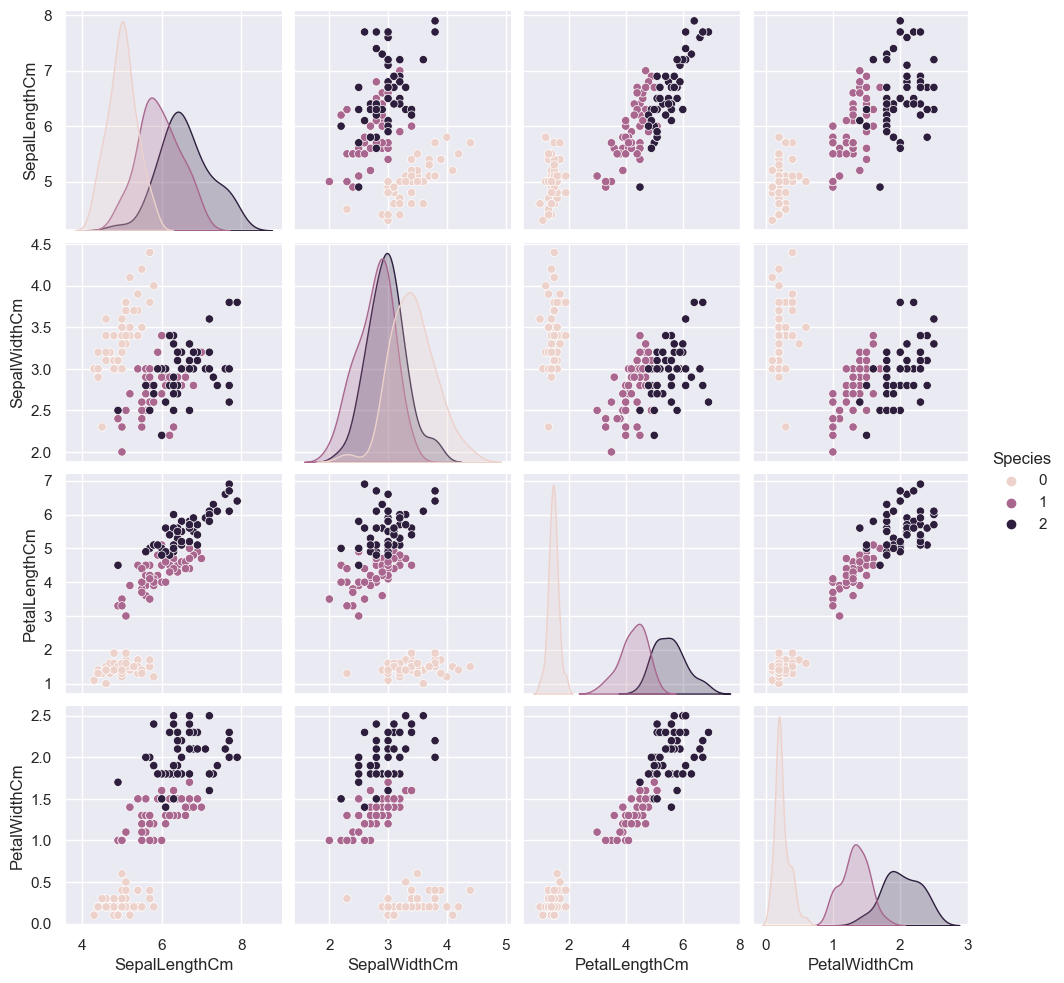

In [11]:
p=sns.pairplot(iris_data, hue = 'Species')

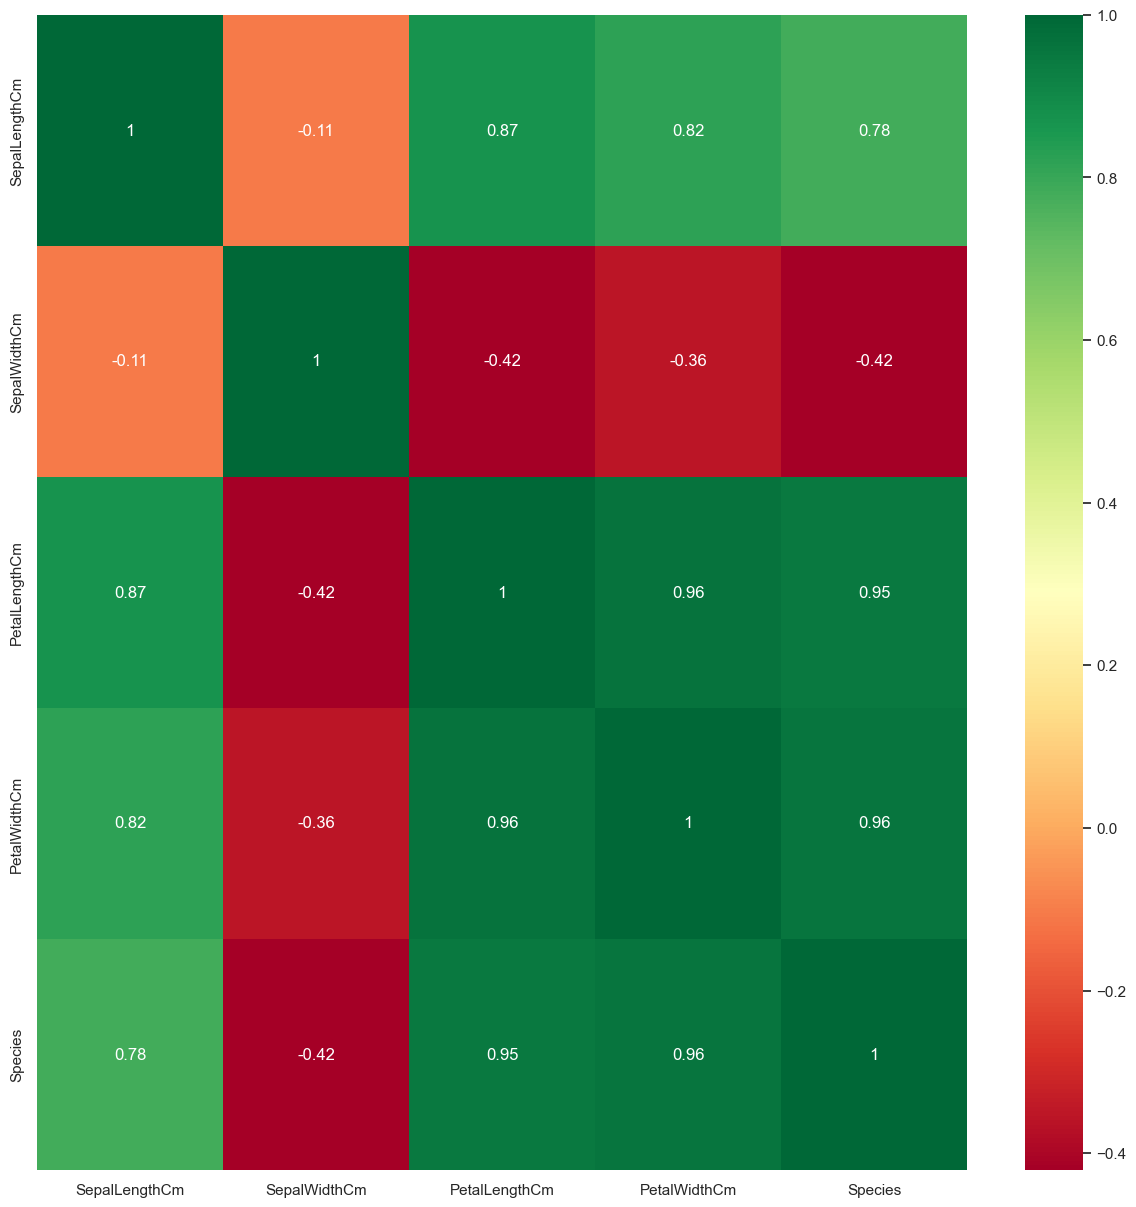

In [12]:
plt.figure(figsize=(15,15))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn') 

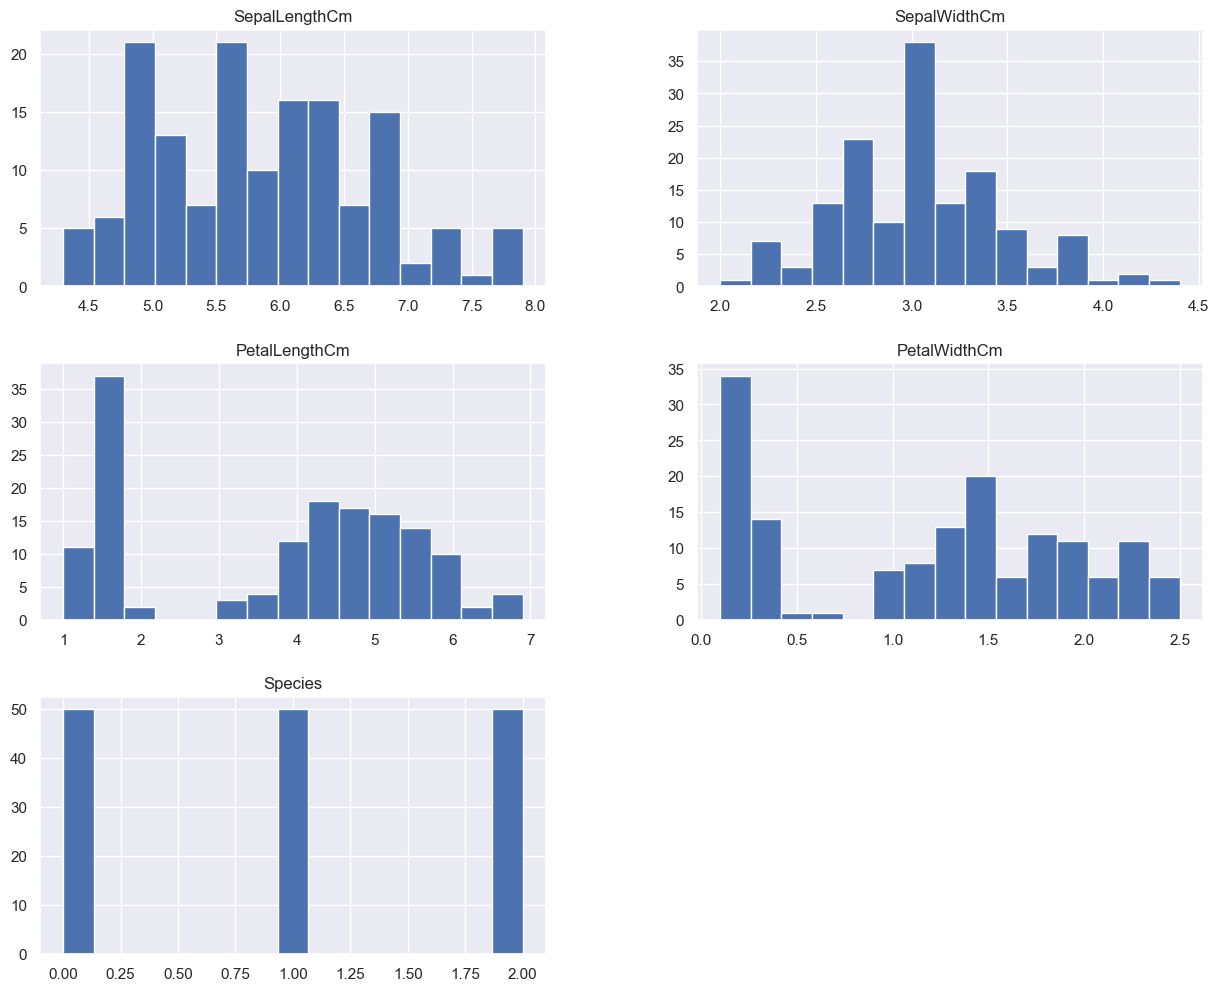

In [13]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

# tanpa PCA

In [14]:
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [17]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


# dengan PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [19]:
pca.get_covariance()

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [20]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

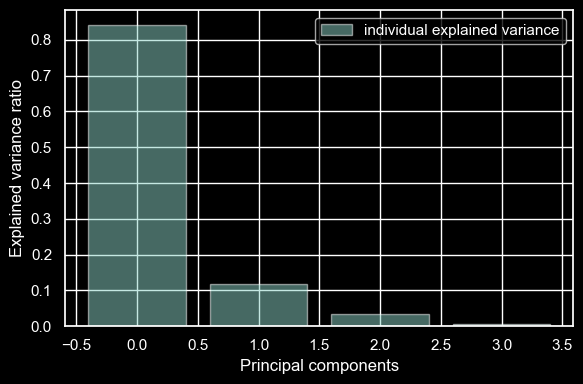

In [21]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [22]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [23]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [24]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


C:\Users\asus\AppData\Local\Temp\ipykernel_13608\3116904412.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


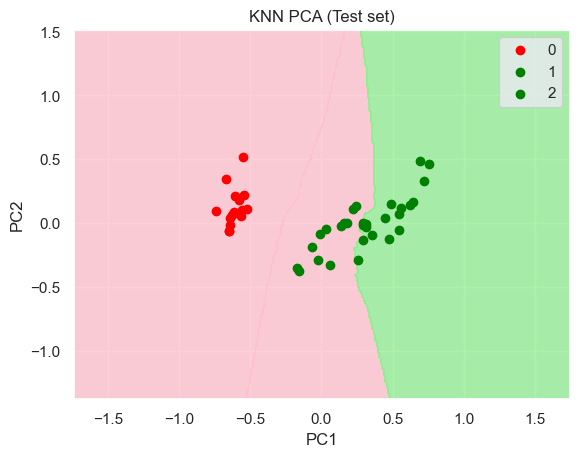

In [25]:
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()